In [1]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
import PIL #importing pillow for image processing
from PIL import Image#importing image from pillow library
import skimage#importing skimage library
import os#importing os library
import time#importing time library
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

#Capture start time of the program
start_time = time.time()

In [2]:
#changing path
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//64//vector//')

In [3]:
#reading numpy array data
rgb_test = np.load('rgb_data.npy')
#reading csv file
rgb_df = pd.read_csv('rgb_data.csv')

In [4]:
features = pd.DataFrame(rgb_test)

In [5]:
features = features.values

In [6]:
n_classes = rgb_df['disease'].unique()
x = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(x)):
    rgb_df.replace(to_replace=n_classes[i],value = x[i],inplace = True)

In [7]:
print(n_classes)

['bacterial_spot' 'early_blight' 'healthy' 'late_blight' 'leaf_mold'
 'septoria_leaf_spot' 'target_spot' 'tomato_mosaic_virus'
 'tomato_yellow_leaf_curl_virus' 'two-spotted_spider_mite']


In [8]:
target = rgb_df['disease'].values

In [9]:
target_binary = label_binarize(target, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = target_binary.shape[1]

In [10]:
#splitting the data to 80 percent and 20 percent
from sklearn.model_selection import train_test_split
Ftrain,Ftest,Ltrain,Ltest=train_test_split(features,target_binary, test_size=0.20, random_state=24)

In [11]:
#importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score

In [12]:
svm_classifier = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True))
y_score = svm_classifier.fit(Ftrain,Ltrain).decision_function(Ftest)

In [13]:
y_score

array([[ -5.16919162,  -3.07810945,   0.81745674, ...,  -6.00109661,
        -12.36317038,  -2.77794854],
       [ -1.71477202,  -2.45965039,   4.32897349, ...,  -7.09241501,
         -5.1911125 ,  -4.49742314],
       [-21.52900507,  -2.20104079,  -4.55389445, ...,  -4.37747007,
          7.83074221,  -3.79743198],
       ...,
       [ -7.96286816,  -4.09559438, -19.54855373, ...,  -6.15277666,
         13.32370207,  -3.51039071],
       [  0.48864019, -12.51606608,  -8.92112804, ..., -11.8991047 ,
          7.29200155,  -6.67460713],
       [ -0.80910002,  -8.133163  , -10.10678678, ..., -10.62575259,
          8.21878166,  -9.70118874]])

In [14]:
n_classes

10

In [15]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Ltest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [16]:
colours = ['red','green','blue','yellow','orange','aqua','cyan','navy','cornflowerblue','darkblue']

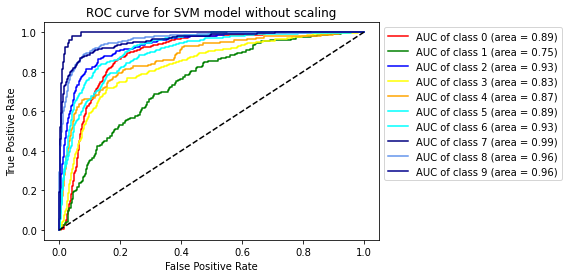

In [17]:
for i, color in zip(range(n_classes), colours):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="AUC of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for SVM model without scaling")
plt.legend(bbox_to_anchor = (1,1))
plt.show()